## Importing the Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
df = pd.read_csv("cardio_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [5]:
print(df.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

## Data Visualisation

In [6]:
# Set the style of seaborn
sns.set_style("whitegrid")

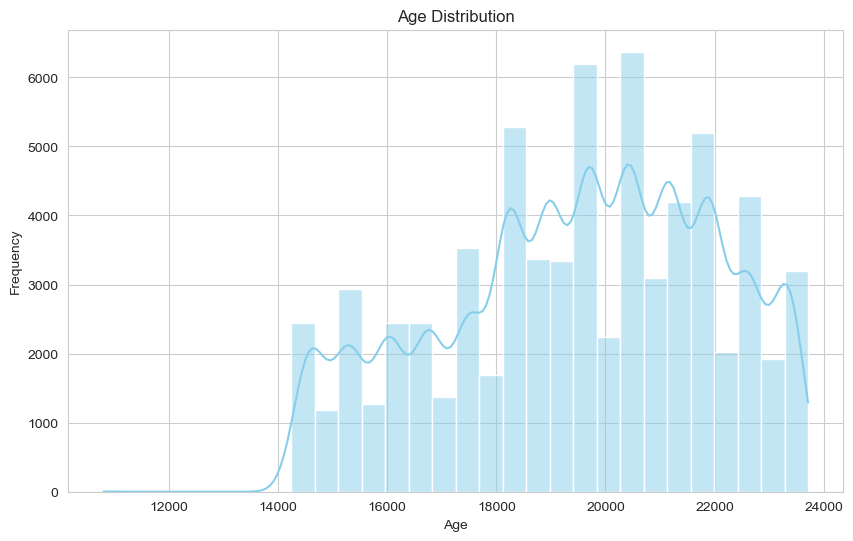

In [7]:
# Visualizing age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

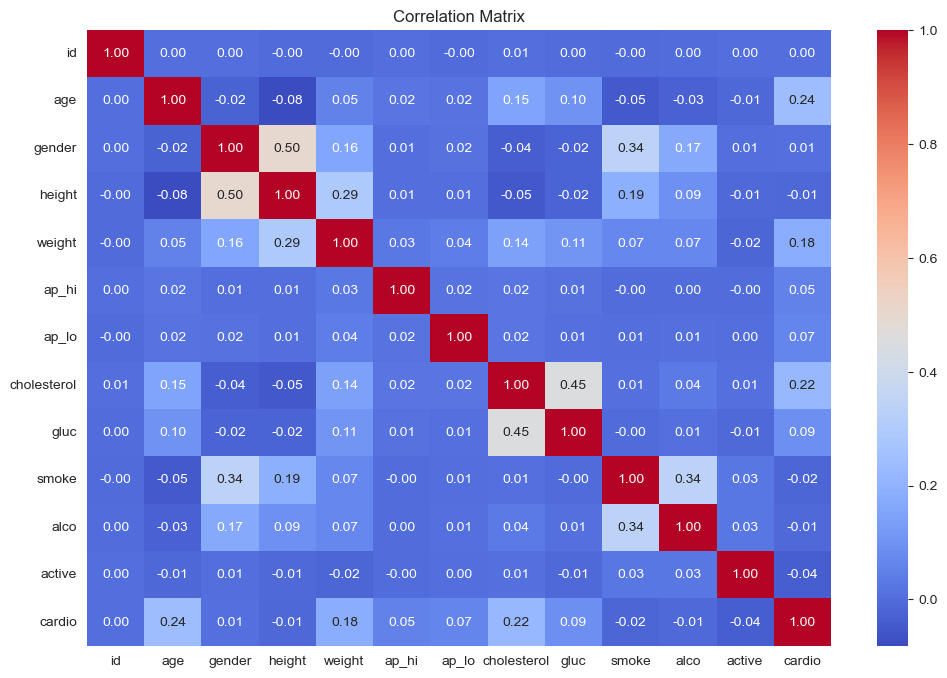

In [8]:
# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

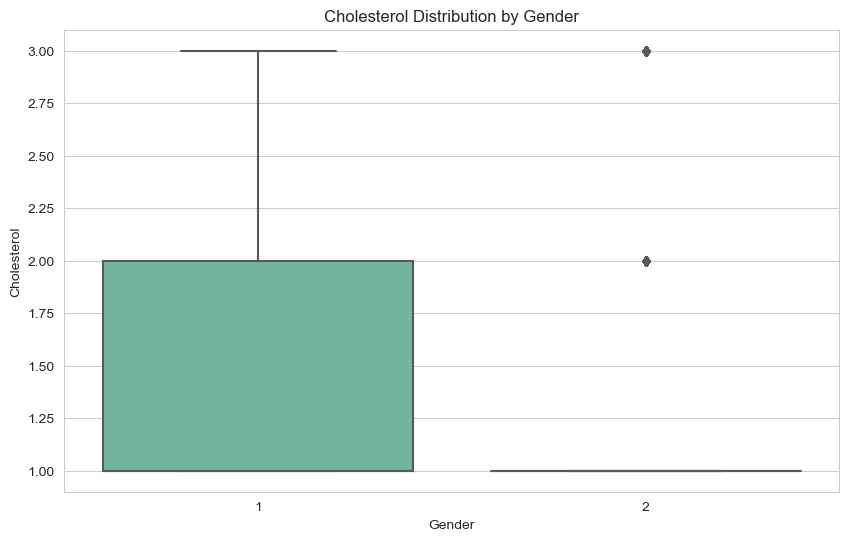

In [9]:
# Visualizing cholesterol distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='cholesterol', palette='Set2')
plt.title('Cholesterol Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol')
plt.show()

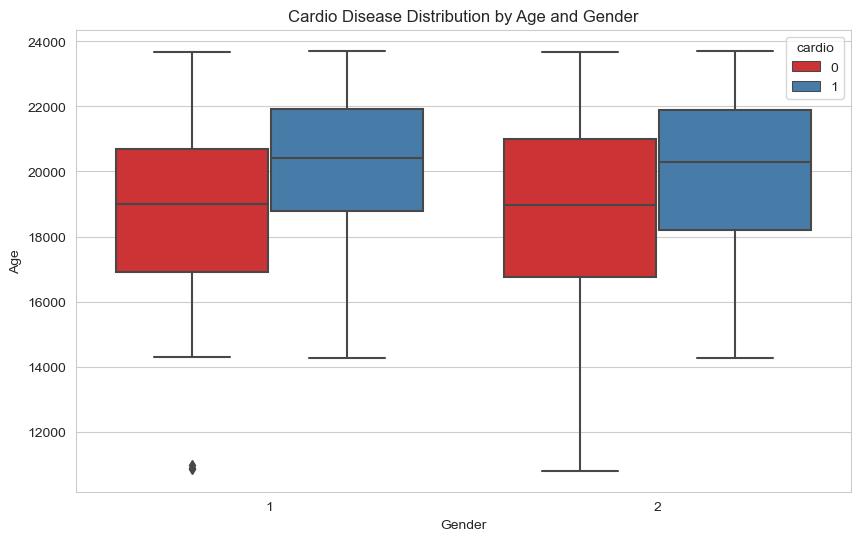

In [10]:
# Visualizing cardio disease distribution by age and gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='age', hue='cardio', palette='Set1')
plt.title('Cardio Disease Distribution by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

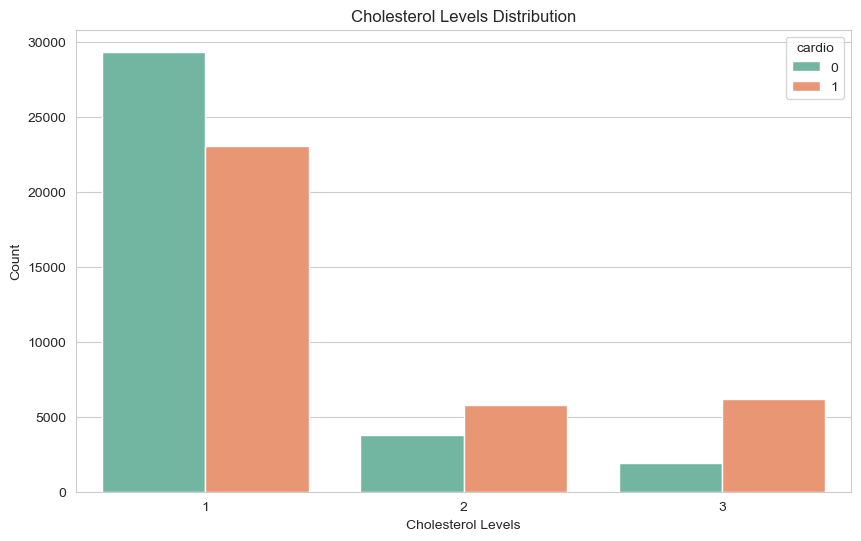

In [11]:
# Visualizing cholesterol and glucose levels distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cholesterol', hue='cardio', palette='Set2')
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.show()

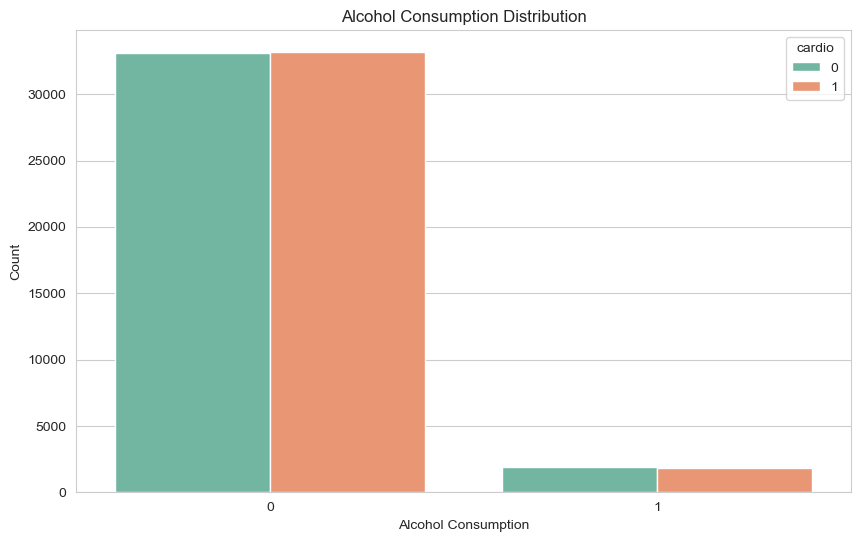

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='alco', hue='cardio', palette='Set2')
plt.title('Alcohol Consumption Distribution')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

In [13]:
# Splitting the data into features and target variable
X = df.drop(columns=['id', 'cardio'])
y = df['cardio']

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Supervised Learning Algorithms

In [15]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [16]:
# Evaluate models
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Model:
Accuracy: 0.7065714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      6988
           1       0.72      0.67      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [17]:
# Decision Tree Classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [18]:
print("\nDecision Tree Classifier Model:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))


Decision Tree Classifier Model:
Accuracy: 0.6277142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [19]:
# Support Vector Machine (SVM) Classifier model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

In [20]:
print("\nSupport Vector Machine (SVM) Classifier Model:")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Classification Report:")
print(classification_report(y_test, svm_y_pred))


Support Vector Machine (SVM) Classifier Model:
Accuracy: 0.6053571428571428
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6988
           1       0.62      0.56      0.59      7012

    accuracy                           0.61     14000
   macro avg       0.61      0.61      0.60     14000
weighted avg       0.61      0.61      0.60     14000



## Performance Metrics

In [21]:
# Calculate probabilities for each class
lr_y_pred_prob = lr_model.predict_proba(X_test)[:,1]
dt_y_pred_prob = dt_model.predict_proba(X_test)[:,1]
svm_y_pred_prob = svm_model.decision_function(X_test)

In [22]:
# Compute ROC curve and ROC area for each model
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_pred_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred_prob)

In [23]:
lr_auc = roc_auc_score(y_test, lr_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)
svm_auc = roc_auc_score(y_test, svm_y_pred_prob)

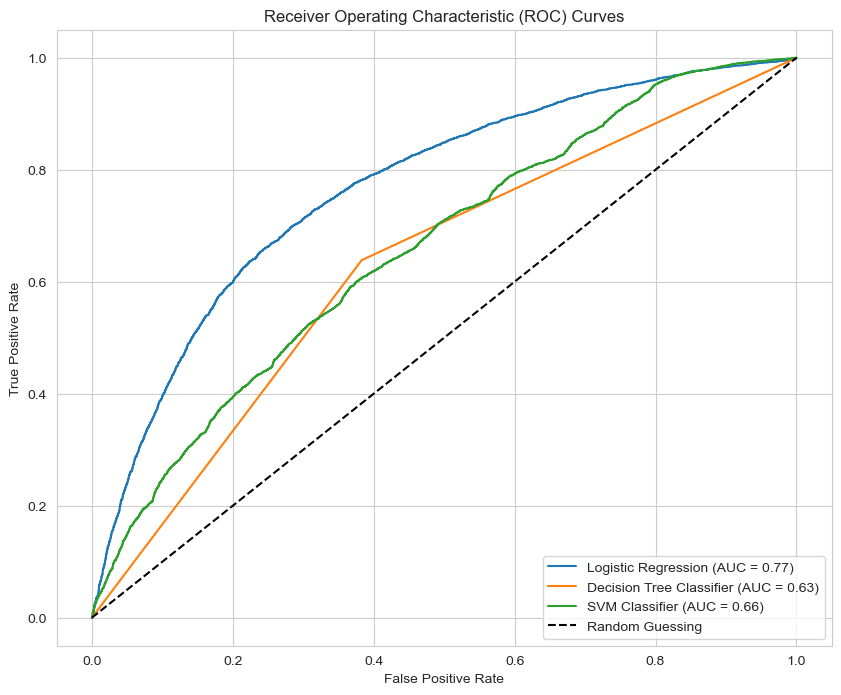

In [24]:
# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree Classifier (AUC = {dt_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM Classifier (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Feature Engineering and Selection

In [25]:
# Random Forest Classifier with Feature Importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [27]:
# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature {idx}: {feature_importances[idx]}")

Feature Importance Ranking:
1. Feature 0: 0.307323895962954
2. Feature 3: 0.1722047564489777
3. Feature 4: 0.17205702712375492
4. Feature 2: 0.1575037888340838
5. Feature 5: 0.09339109636599179
6. Feature 6: 0.03702223486177266
7. Feature 7: 0.016435502400568507
8. Feature 1: 0.015420624560878655
9. Feature 10: 0.012980050384049665
10. Feature 8: 0.00848512033300273
11. Feature 9: 0.007175902723965523


In [28]:
# Logistic Regression with Recursive Feature Elimination
lr_model = LogisticRegression()
rfe = RFE(lr_model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [29]:
# Get selected features
selected_features = [i for i, val in enumerate(rfe.support_) if val]

print("\nSelected Features from RFE:")
for feature_idx in selected_features:
    print(f"Feature {feature_idx}")


Selected Features from RFE:
Feature 6
Feature 7
Feature 8
Feature 9
Feature 10


In [30]:
# Re-train models with selected features
rf_model_selected = RandomForestClassifier()
rf_model_selected.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rf_selected_accuracy = rf_model_selected.score(X_test, y_test)

In [32]:
print("\nRandom Forest Classifier with Selected Features:")
print("Accuracy:", rf_selected_accuracy)


Random Forest Classifier with Selected Features:
Accuracy: 0.7173571428571428


In [33]:
lr_model_selected = LogisticRegression()
lr_model_selected.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr_selected_accuracy = lr_model_selected.score(X_test, y_test)

In [35]:
print("\nLogistic Regression with Selected Features:")
print("Accuracy:", lr_selected_accuracy)


Logistic Regression with Selected Features:
Accuracy: 0.7065714285714285


## Cross-Validation

In [36]:
# Define the models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

In [37]:
# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy (in this case, k-fold cross-validation)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [38]:
# Perform cross-validation for Random Forest Classifier
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

In [39]:
print("Random Forest Classifier Cross-Validation Scores:")
print(rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

Random Forest Classifier Cross-Validation Scores:
[0.71421429 0.71821429 0.71185714 0.71621429 0.71542857]
Mean Accuracy: 0.7151857142857143


In [40]:
# Perform cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='accuracy')

In [41]:
print("\nLogistic Regression Cross-Validation Scores:")
print(lr_cv_scores)
print("Mean Accuracy:", lr_cv_scores.mean())


Logistic Regression Cross-Validation Scores:
[0.70692857 0.70385714 0.70592857 0.70092857 0.70678571]
Mean Accuracy: 0.7048857142857143
